In [64]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [67]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [65]:
!pip install optuna

In [66]:
# Primitive Data Processing

from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler




# Check for null values
print("Missing values in train_df:")
print(train_df.isnull().sum())

print("\nMissing values in test_df:")
print(test_df.isnull().sum())



print("\nPrimitive processing steps checked.")

Missing values in train_df:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
WeightCategory                    0
dtype: int64

Missing values in test_df:
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                            

In [ ]:
# Examine categorical feature distributions

categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Determine the number of rows and columns for the grid
n_features = len(categorical_features)
n_cols = 3  # You can adjust the number of columns as needed
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, feature in enumerate(categorical_features):
    sns.countplot(data=train_df, x=feature, order=train_df[feature].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [68]:
train_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [69]:
train_df=train_df.drop("id",axis='columns')
test_df=test_df.drop("id",axis='columns')

In [70]:
train_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [71]:
x=train_df.drop("WeightCategory",axis='columns')
y=train_df['WeightCategory']

In [72]:
numeric_features = ['Age', 'Height','Weight','FCVC','NCP','CH2O','FAF','TUE']

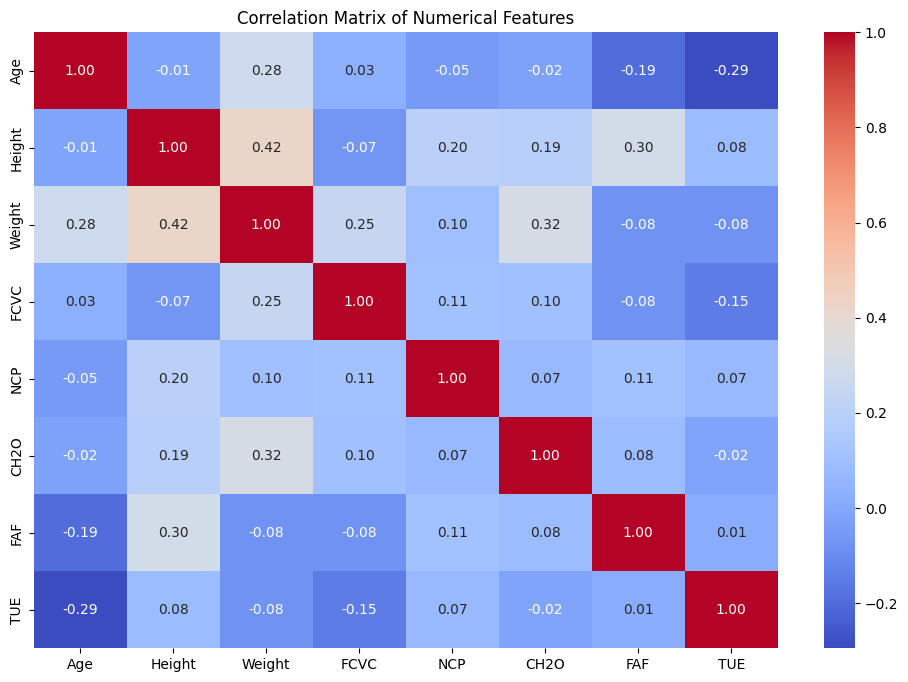

In [73]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [74]:
transformer = ColumnTransformer(transformers=[
    ('t1',OneHotEncoder(drop='first'),['CAEC']),
    ('t2',OneHotEncoder(drop='first'),['CALC']),
    ('t3', StandardScaler(), numeric_features),

    ('t4',OneHotEncoder(drop='first'),['Gender','family_history_with_overweight','FAVC','SMOKE','SCC','MTRANS'])
],remainder='passthrough')

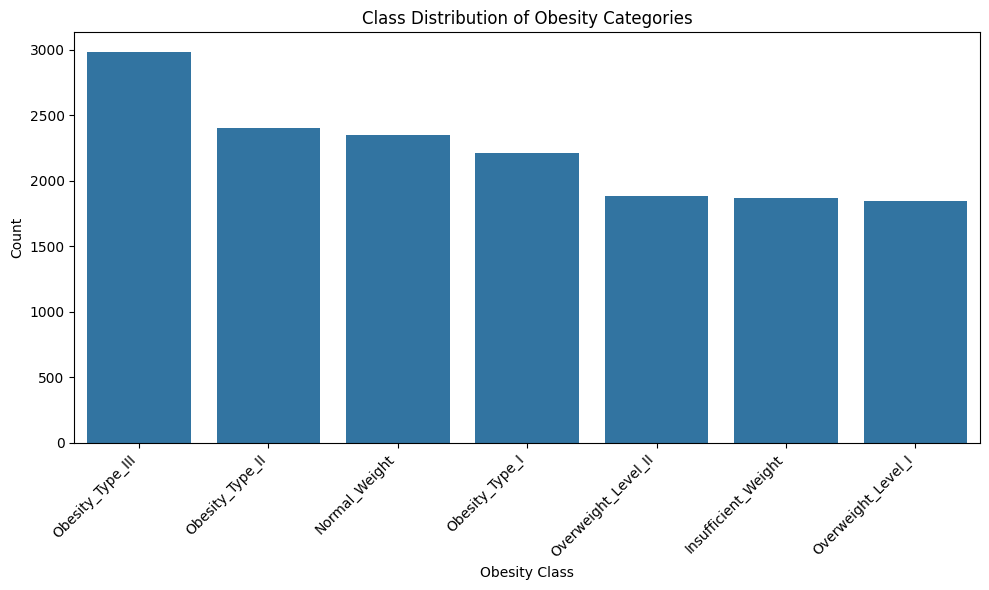

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas to ensure train_df is accessible

# Assuming 'y' is the target variable (WeightCategory)
# If y is a pandas Series, we can directly use it, otherwise convert it
if not isinstance(y, pd.Series):
  y_series = pd.Series(y, name="WeightCategory")
else:
  y_series = y

plt.figure(figsize=(10, 6)) # Adjusted figure size for better readability
sns.countplot(data=None, x=y_series, order=y_series.value_counts().index) # Use data=None and pass the series directly, order by count
plt.title("Class Distribution of Obesity Categories")
plt.xlabel("Obesity Class")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability if many classes
plt.tight_layout()
plt.show()

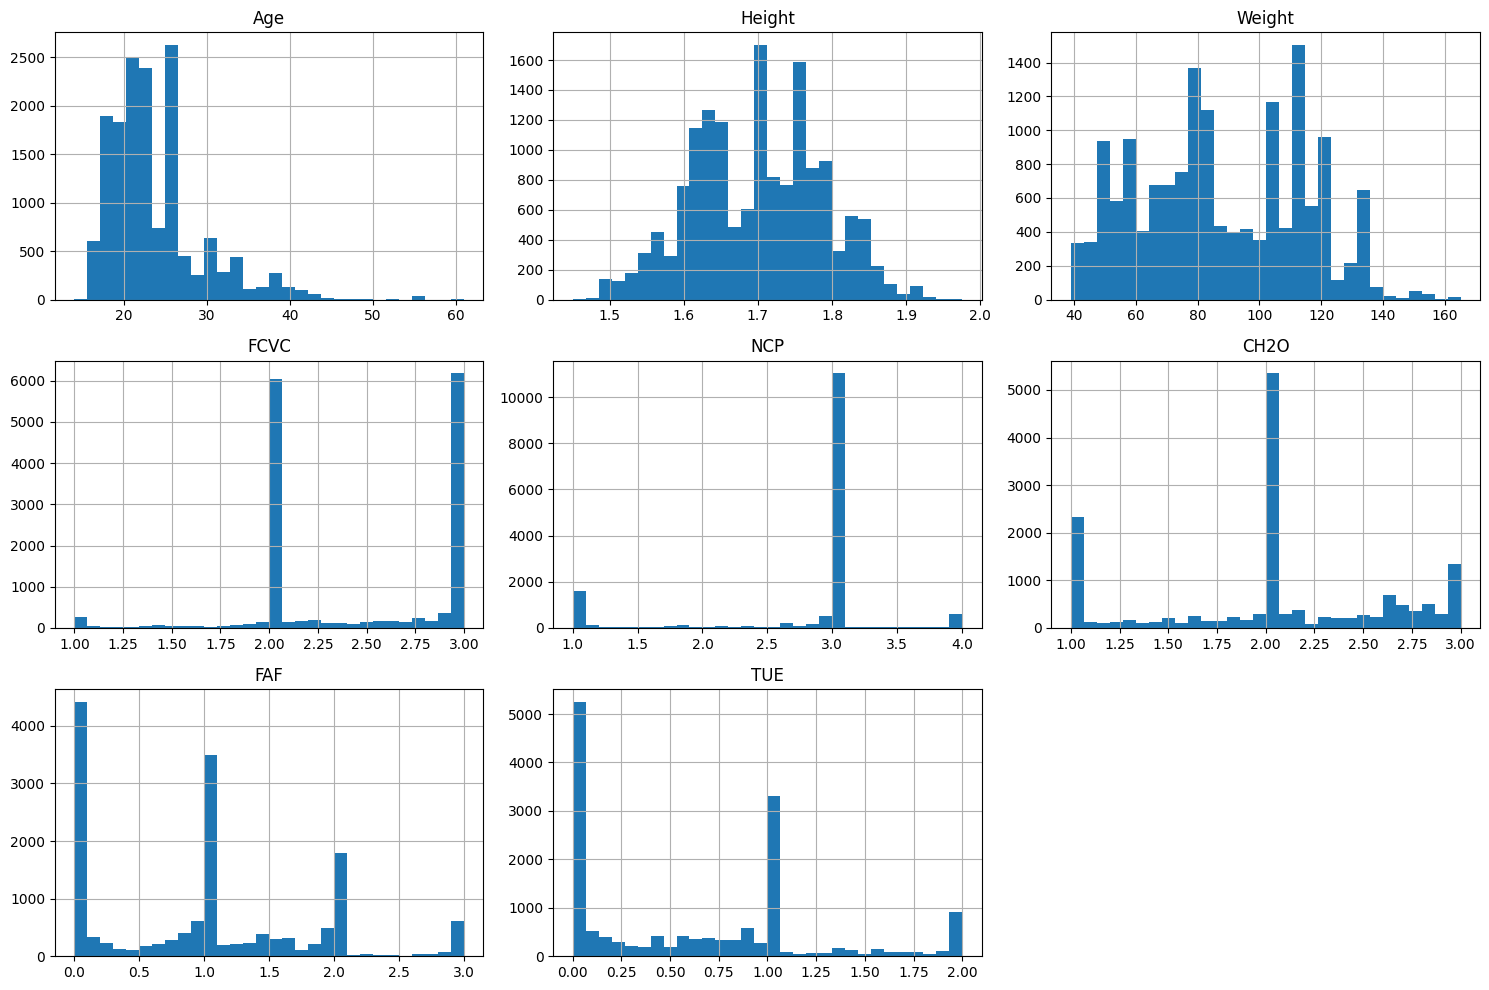

In [76]:
numerical_features = ['Age', 'Height','Weight','FCVC','NCP','CH2O','FAF','TUE']

train_df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

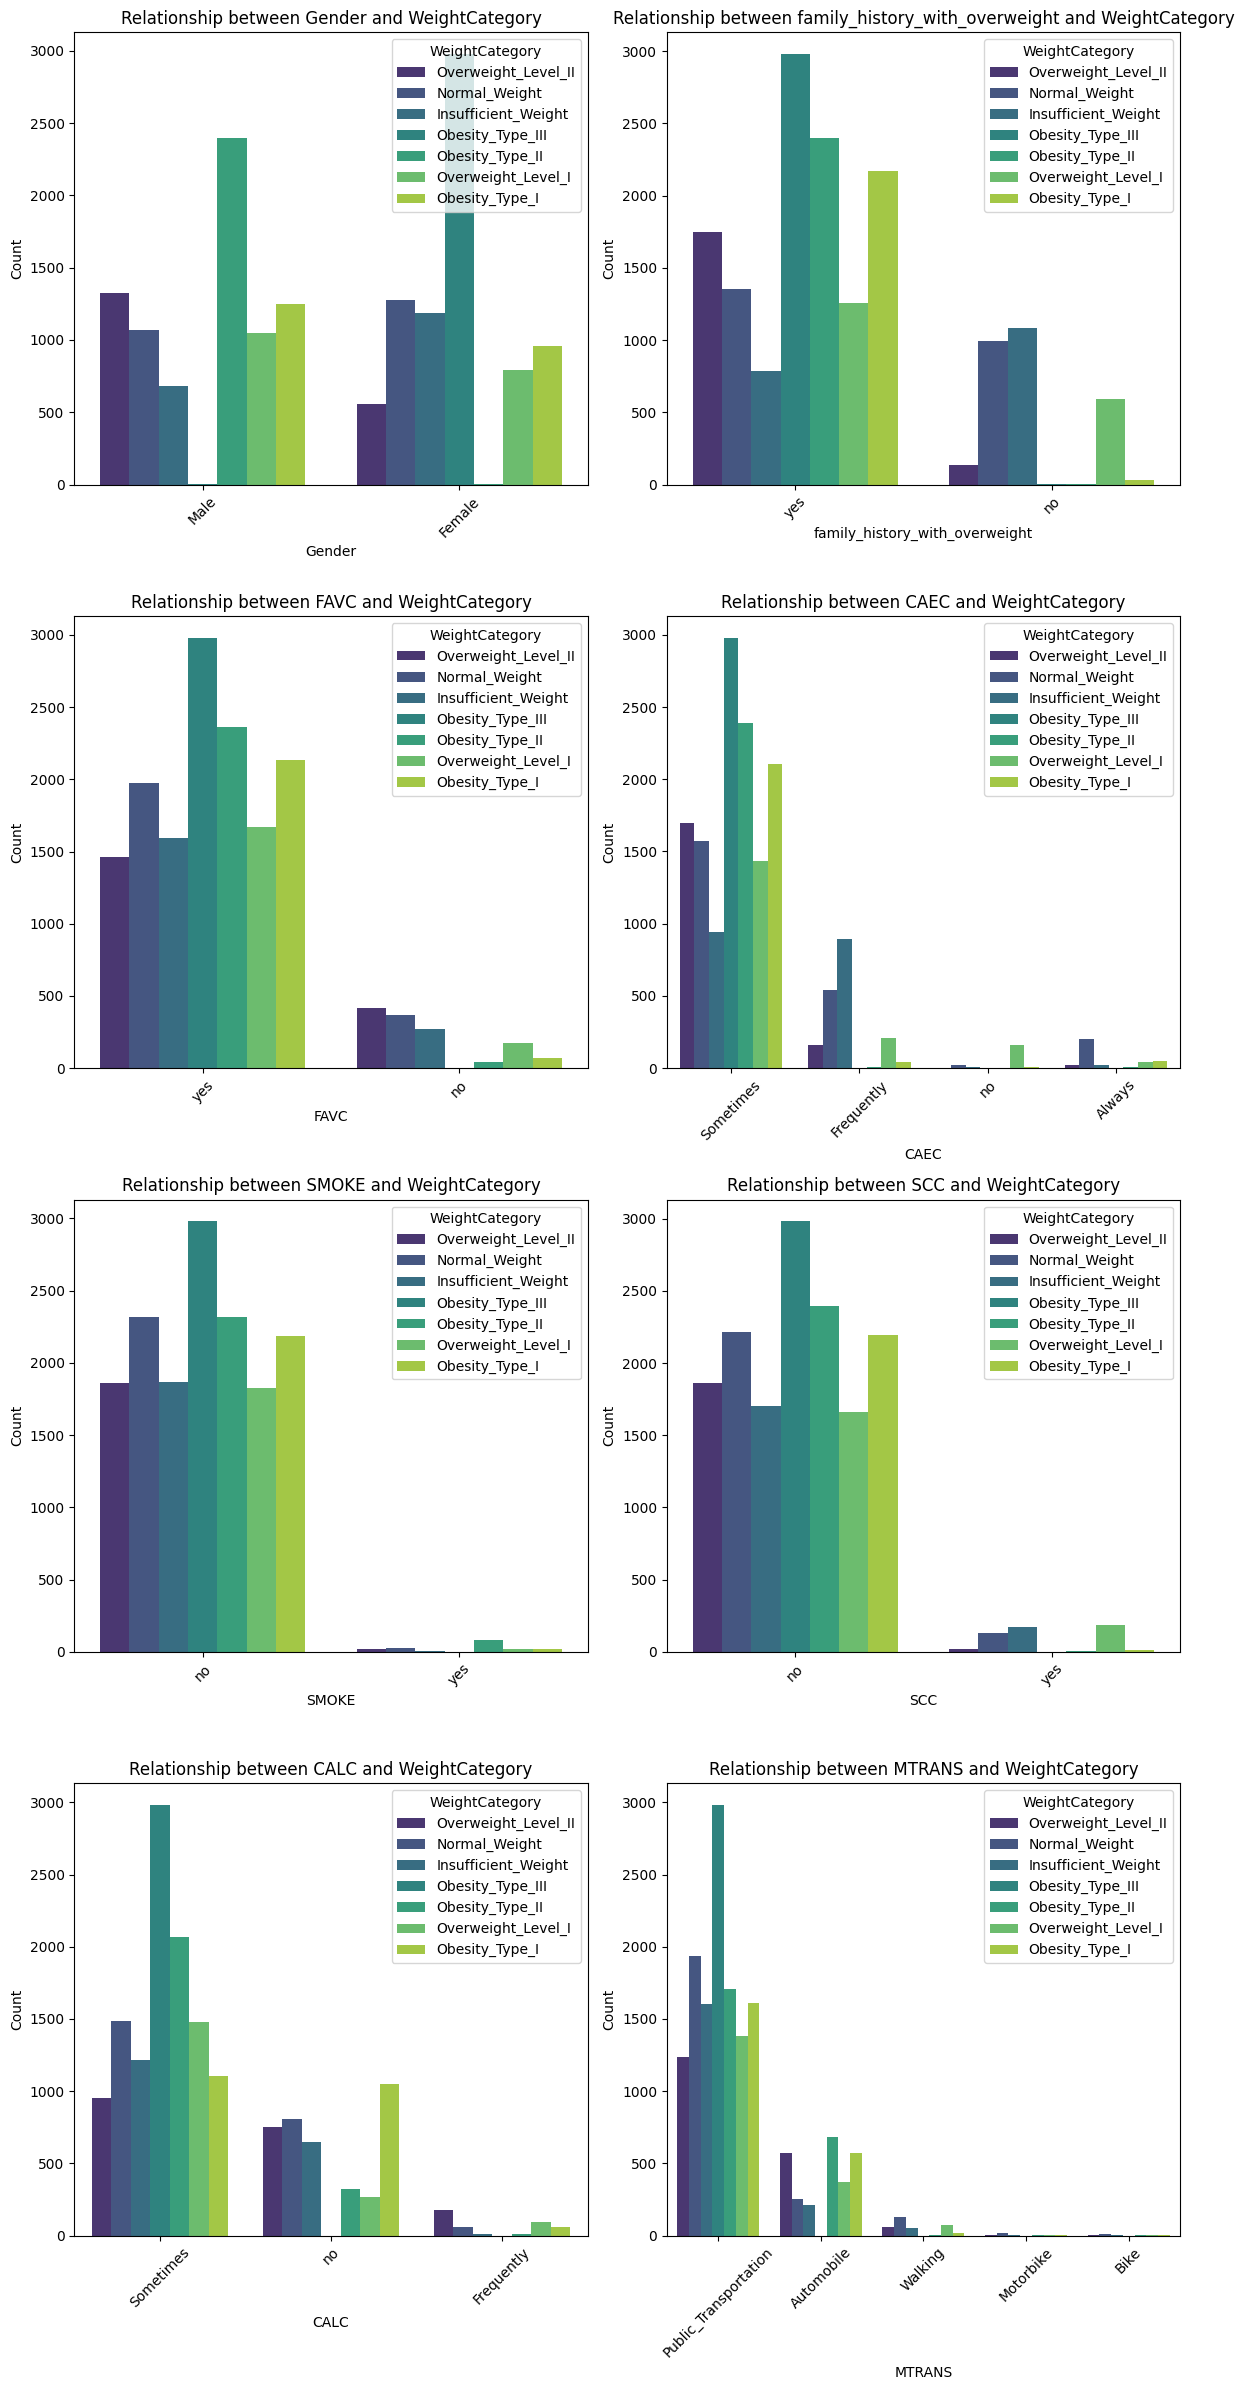

In [77]:
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
target = 'WeightCategory'

n_features = len(categorical_features)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 6)) # Adjust figsize as needed
axes = axes.flatten()
for i, feature in enumerate(categorical_features):
    sns.countplot(data=train_df, x=feature, hue=target, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Relationship between {feature} and {target}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title=target)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

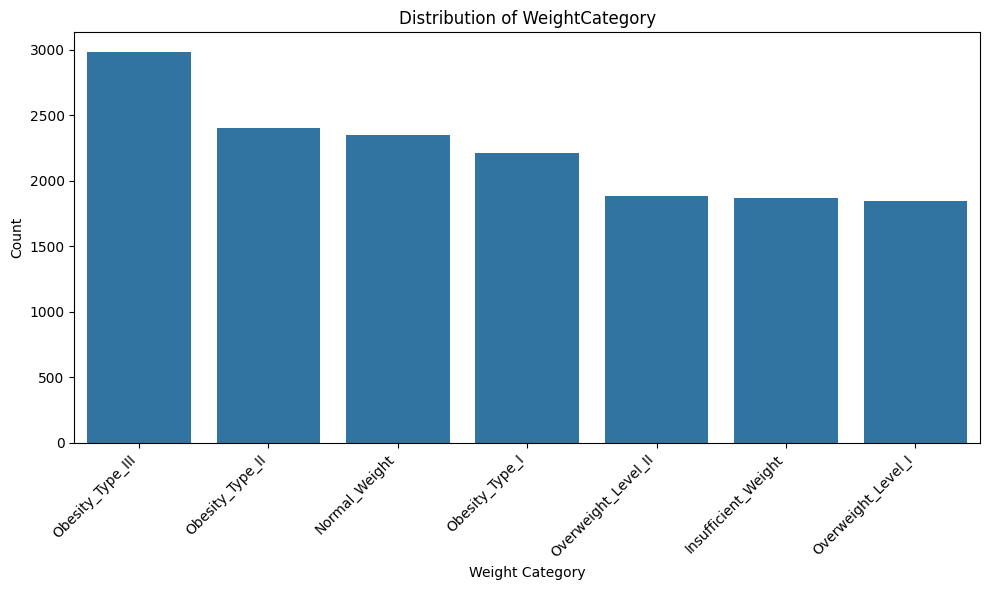

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

train_df = pd.read_csv('train.csv')

plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='WeightCategory', order=train_df['WeightCategory'].value_counts().index)
plt.title('Distribution of WeightCategory')
plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [79]:
y = np.array(y)
y.shape

(15533,)

In [80]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

encoder = OrdinalEncoder()
y_encoded = encoder.fit_transform(np.array(y).reshape(-1, 1))
y_encoded.shape

(15533, 1)

In [81]:
from xgboost import XGBClassifier

In [82]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 460, 480),
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.065),
        'max_depth': trial.suggest_int('max_depth', 3, 6),
        'min_child_weight': trial.suggest_int('min_child_weight', 2, 5),
        'gamma': trial.suggest_float('gamma', 0.2, 0.4),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 0.8),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.4, 0.6),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 0.5),
    }

    model = XGBClassifier(**params, objective='multi:softmax')

    # cross-validation
    score = cross_val_score(model, x_transformed, y_encoded, cv=3, scoring='accuracy').mean() # Use original y

    return score


In [83]:
x_transformed = transformer.fit_transform(x)

In [84]:
import optuna
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


study = optuna.create_study(direction='maximize')

# Encode y to int
label_encoder = LabelEncoder()
y_encoded_labels = label_encoder.fit_transform(y)

# 100 trials optimization - 50 and 25 didnt yeild the same performance
study.optimize(lambda trial: objective(trial), n_trials=100, show_progress_bar=True)

# Print the best hyperparameters and the best score

print("Best hyperparameters:", study.best_params)
print("Best accuracy:", study.best_value)
# best_params={'n_estimators': 476,  'learning_rate': 0.056175675016670416, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.3354617624351886, 'subsample': 0.7871797069127701, 'colsample_bytree': 0.5071468557602662, 'reg_alpha': 0.5393018307093757, 'reg_lambda': 0.0809287158560023}
final_model = XGBClassifier(**study.best_params, random_state=42, objective='multi:softmax', num_class=len(label_encoder.classes_))
final_model.fit(x_transformed, y_encoded_labels)

# Make predictions on the training data to evaluate accuracy
y_pred = final_model.predict(x_transformed)

# Calculate and print the accuracy
accuracy = accuracy_score(y_encoded_labels, y_pred)
print(f"Accuracy on the training data: {accuracy}")



[I 2025-10-26 17:48:18,301] A new study created in memory with name: no-name-75389caf-335c-4919-93cd-769ad094c633


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-10-26 17:48:36,893] Trial 0 finished with value: 0.90600668608832 and parameters: {'n_estimators': 474, 'learning_rate': 0.06235499917507395, 'max_depth': 6, 'min_child_weight': 2, 'gamma': 0.34579567812747625, 'subsample': 0.9949403849426741, 'colsample_bytree': 0.5730228716362209, 'reg_alpha': 0.5584790058912247, 'reg_lambda': 0.3059159749022784}. Best is trial 0 with value: 0.90600668608832.
[I 2025-10-26 17:48:49,657] Trial 1 finished with value: 0.9058779859884263 and parameters: {'n_estimators': 472, 'learning_rate': 0.05899696134845263, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 0.21774427785332423, 'subsample': 0.8418658194427651, 'colsample_bytree': 0.5435454623703054, 'reg_alpha': 0.5168153381110245, 'reg_lambda': 0.42199927981057717}. Best is trial 0 with value: 0.90600668608832.
[I 2025-10-26 17:49:04,202] Trial 2 finished with value: 0.9043327640934132 and parameters: {'n_estimators': 474, 'learning_rate': 0.0583251377112496, 'max_depth': 6, 'min_child_weight'

KeyboardInterrupt: 

In [ ]:

# fit transform predict
x_transformed = transformer.fit_transform(x)
test_transformed = transformer.transform(test_df)
test_predictions_encoded = final_model.predict(test_transformed)

# decode
test_predictions = encoder.inverse_transform(test_predictions_encoded.reshape(-1, 1))

# submission
submission_df = pd.DataFrame({'id': test_df.index + 15533, 'Weight_Category': test_predictions.flatten()})
submission_df.to_csv('xgb_optuna.csv', index=False)

print("xgb_optuna.csv created successfully with predictions from the optimized model!")

In [ ]:
numerical_features = ['Age', 'Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
target = 'WeightCategory'

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_df, x=target, y=feature, order=train_df[target].value_counts().index)
    plt.title(f'{feature} vs {target}')
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()